In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# old funcs
import seaborn as sns
import math
from scipy.stats import norm, t  # таблица накопленного нормраспределения z
sns.set_theme()

# стандартные параметры нормального распределения
def norm_mu_func(lst): 
    return sum(lst) / len(lst)

def norm_dispersion_func(data):
    mean = norm_mu_func(data)
    d_sum = 0
    for i in data:
        d_sum = d_sum + (mean - i)**2
    return d_sum / len(data)

def norm_sigma_func(data):
    return norm_dispersion_func(data)**0.5

def norm_dist_graph(data, X=None):
    M = norm_mu_func(data)
    sigma = norm_sigma_func(data)
    y = lambda data: list(map(lambda x: \
               math.e**(-((x-M)**2)/(2*sigma**2)) / (sigma  * (2*math.pi)**0.5), \
               data))
    if X:
        return y([X])
    else:
        plt = sns.lineplot(x=data, y=y(data))
        plt.axvline(M)
        plt.axvline(M-sigma)
        plt.axvline(M+sigma)

def norm_get_z(to_find, sigma, M):
    return (to_find - M) / sigma

def norm_z_to_probability(z):
    '''
    вытащить значение из таблицы накопленного нормального распредееления по z
    '''
    return norm.cdf(z)


# стандартные параметры равномерного распределения
def ravn_mu_func(data): 
    return (max(data)+min(data))/2

def ravn_dispersion_func(data):
    return (max(data)-min(data))**2 / 12

def ravn_sigma_func(data):
    return ravn_dispersion_func(data)**0.5

def ravn_dist_graph(data, X=None):
    M = ravn_mu_func(data)
    sigma = ravn_sigma_func(data)
    a = min(data)
    b = max(data)
    y = lambda data: list(map(lambda x: \
                              (x-a) / (b-a), \
                              data))
    for ind, i in enumerate(y(data)):
        if i < 0:
            y[ind] = 0
        if i > 1:
            y[ind] = 1
    if X:
        return y([X])
    else:
        return sns.lineplot(x=x, y=y(x))

def z_criteriy(M, a, sigma, n):
    Z = -norm.ppf(a / 2)
    interval = Z * (sigma / n**0.5)
    return [M - interval, M + interval]


def t_criteriy(data, M, a, n):
    '''критерий-стьюдента'''
    T = -t.ppf(a / 2, df=n-1)
    sigma = np.std(data, ddof=1) # несмещенная сигма (n-1)
    interval = T * (sigma / n**0.5)
    return [M - interval, M + interval]



# (1)
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):  
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],  
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].  
* Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy. Полученные значения должны быть равны.  
* Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков, а затем с использованием функций из библиотек numpy и pandas.

In [3]:
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
df = pd.DataFrame.from_dict(dict(zip(zp, ks)), orient='index')
df = df.reset_index()
df.columns  = ['Зарплата', 'Кредитный рейтинг']
df

,Зарплата,Кредитный рейтинг
0,35,401
1,45,574
2,190,874
3,200,919
4,40,459
5,70,739
6,54,653
7,150,902
8,120,746
9,110,832


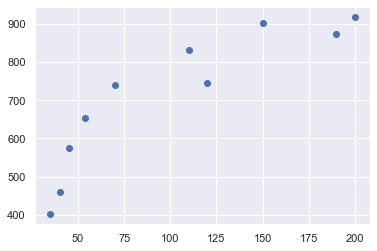

In [4]:
plt.scatter(zp, ks)
plt.show()

находим ковариацию
$$cov_{XY} = M[(X - M(X))(Y - M(Y))] = M(XY) - M(X)M(Y)=\overline{X \cdot Y} - \overline{X} \cdot \overline{Y}$$

In [5]:
# расчет по формуле
first = df['Зарплата']*df['Кредитный рейтинг']
first_mean = first.describe()[1]
zp_mean = df['Зарплата'].describe()[1]
ks_mean = df['Кредитный рейтинг'].describe()[1]
second_mean = zp_mean * ks_mean
cov = first_mean - second_mean
cov

9157.839999999997

In [6]:
# расчет с помощью бибилиотеки numpy
np.cov(np.array(zp), np.array(ks), ddof=0)

array([[ 3494.64,  9157.84],
       [ 9157.84, 30468.89]])

In [7]:
############# корреляция

расчет корреляции Пирсона: $$r_{XY} = \frac{cov_{XY}}{\sigma_{X}\sigma_{Y}}$$

In [8]:
corr = cov / (np.array(zp).std()*np.array(ks).std())
corr

0.8874900920739158

In [9]:
# pandas correlation
df.corr()

,Зарплата,Кредитный рейтинг
Зарплата,1.00000,0.88749
Кредитный рейтинг,0.88749,1.00000


In [10]:
# numpy correlation
np.corrcoef(np.array(zp), np.array(ks))

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

# (2)
Измерены значения IQ выборки студентов, обучающихся в местных технических вузах:  
131, 125, 115, 122, 131, 115, 107, 99, 125, 111.
Известно, что в генеральной совокупности IQ распределен нормально.  
* Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [11]:
iqs = [131, 125, 115, 122, 131, 115, 107, 99, 125, 111]
alpha = 1 - 0.95

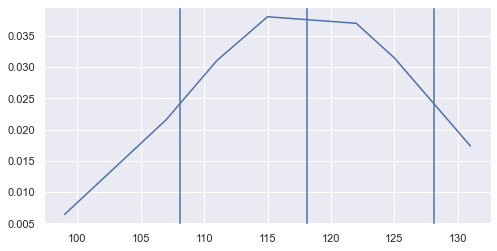

In [12]:
M = norm_mu_func(iqs)
n = len(iqs)
sns.set(rc={"figure.figsize": (8, 4)})
norm_dist_graph(iqs)

In [13]:
# так как ср.кв. отклонение неизвестно, используем критерий стьюдента
f'С 95% вероятностью матожидание находится в интервале {t_criteriy(iqs, M, alpha, n)}'

'С 95% вероятностью матожидание находится в интервале [110.55608365158724, 125.64391634841274]'

# (3)
Известно, что рост футболистов в сборной распределен нормально с дисперсией генеральной совокупности, равной 25 кв.см.  
Объем выборки равен 27, среднее выборочное составляет 174.2.
* Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [14]:
D = 25
n = 27
m = 174.2
alpha = 1 - 0.95

In [15]:
# ср.кв. отклонение известно, используем z-критерий
f'С 95% вероятностью матожидание находится в интервале {z_criteriy(m, alpha, D**0.5, n)}'

'С 95% вероятностью матожидание находится в интервале [172.3140237765397, 176.08597622346028]'